# American Airlines Analysis
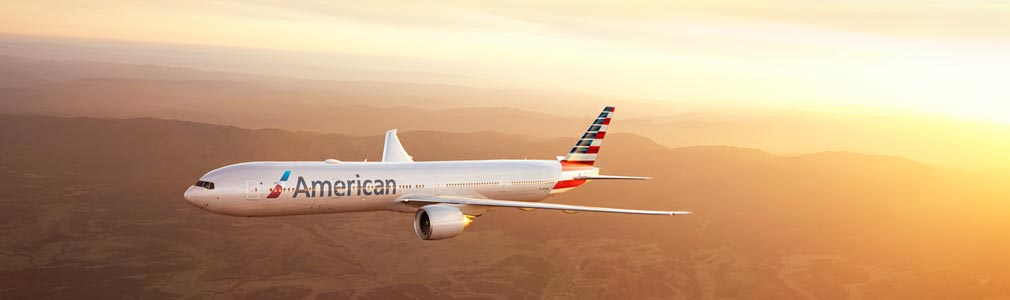

The purpose of this notebook is characterization and analysis of the American Airlines over the years 2007 and 2008. I was given two data set from Bureau of Transportation Statistics which I preprocesed and saved as csv files containing only data about American Airlines carrier. First I will load libraries neccesary to the Analysis. 

In [18]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import cufflinks
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
from plotly import tools
plotly.tools.set_credentials_file(username='***', api_key='***')
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

I am using community online version of plotly as I found it more estethic for the viewer. Therefore output plots are saved as png images in notebook. The code, however is editable and after giving credentials it is ready to generate the plots.

Preprocessed data is saved into two csv for each year. I will now load it into one pandas dataframe. 

In [2]:
flights = pd.concat([pd.read_csv(f) for f in glob.glob('data*.csv')], ignore_index = True)

In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238742 entries, 0 to 1238741
Data columns (total 29 columns):
Year                 1238742 non-null int64
Month                1238742 non-null int64
DayofMonth           1238742 non-null int64
DayOfWeek            1238742 non-null int64
DepTime              1203466 non-null float64
CRSDepTime           1238742 non-null int64
ArrTime              1199672 non-null float64
CRSArrTime           1238742 non-null int64
UniqueCarrier        1238742 non-null object
FlightNum            1238742 non-null int64
TailNum              1223040 non-null object
ActualElapsedTime    1199321 non-null float64
CRSElapsedTime       1238742 non-null float64
AirTime              1199321 non-null float64
ArrDelay             1199321 non-null float64
DepDelay             1203466 non-null float64
Origin               1238742 non-null object
Dest                 1238742 non-null object
Distance             1238742 non-null int64
TaxiIn               1219693 non-

Dataset contains 29 columns.
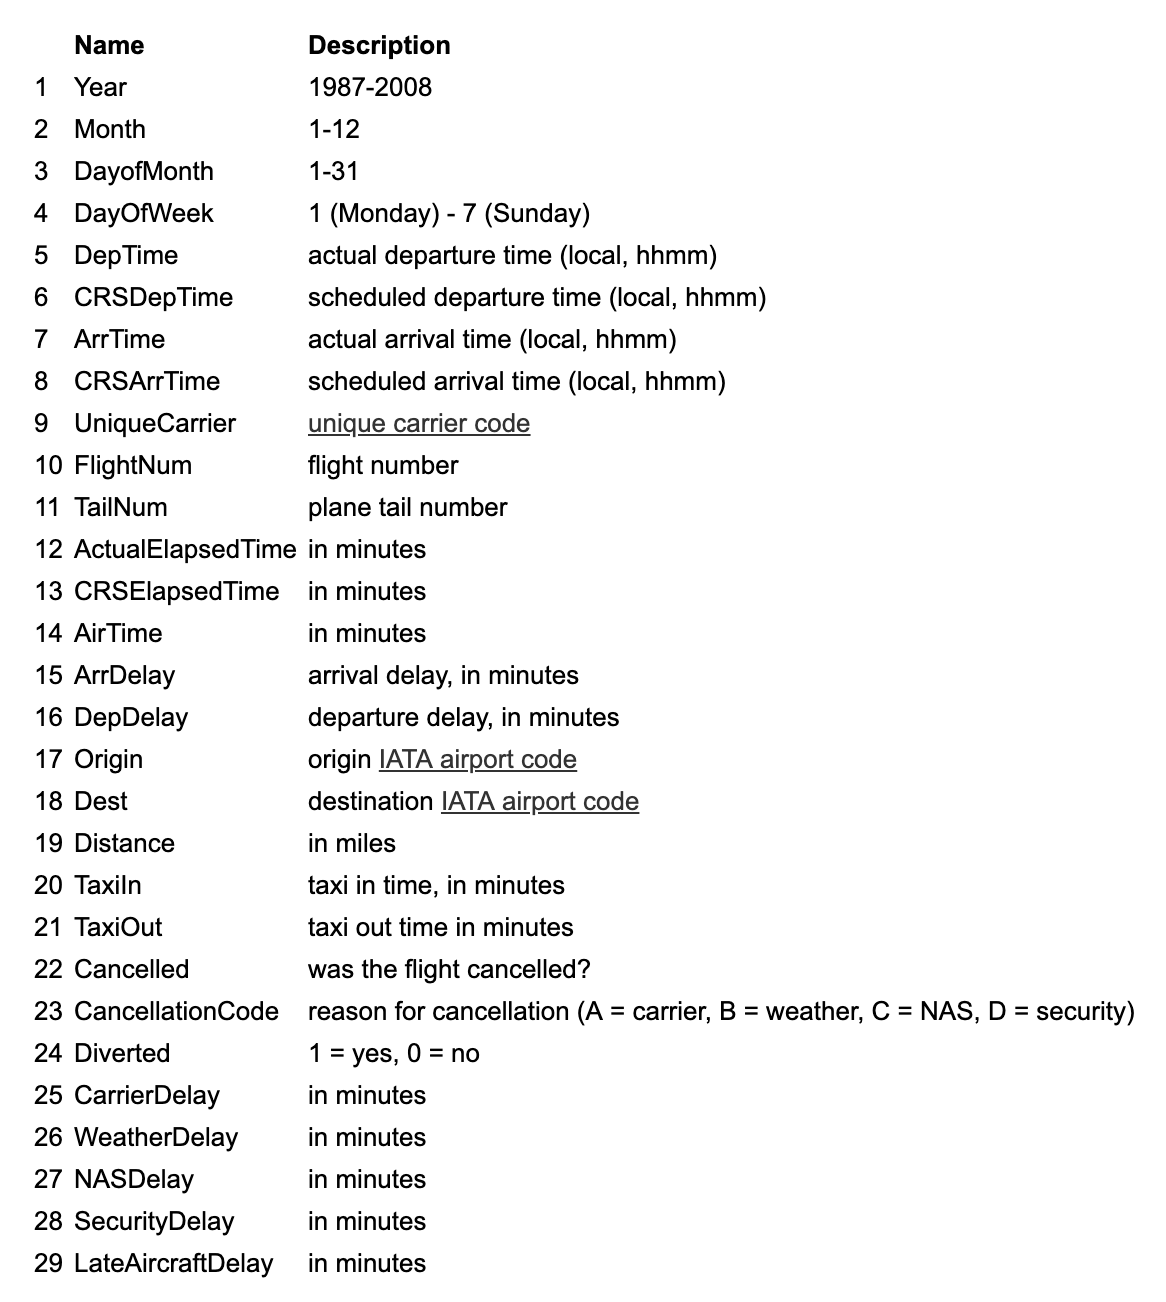
source: http://stat-computing.org/dataexpo/2009/the-data.html

In [4]:
flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,854.0,900,1230.0,1210,AA,1,N336AA,396.0,370.0,333.0,20.0,-6.0,JFK,LAX,2475,39.0,24.0,0,NaN,0,0.0,0.0,20.0,0.0,0.0
1,2007,1,2,2,855.0,900,1235.0,1210,AA,1,N321AA,400.0,370.0,326.0,25.0,-5.0,JFK,LAX,2475,39.0,35.0,0,NaN,0,0.0,0.0,25.0,0.0,0.0
2,2007,1,3,3,856.0,900,1213.0,1210,AA,1,N336AA,377.0,370.0,312.0,3.0,-4.0,JFK,LAX,2475,24.0,41.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2007,1,4,4,901.0,900,1249.0,1210,AA,1,N339AA,408.0,370.0,352.0,39.0,1.0,JFK,LAX,2475,8.0,48.0,0,NaN,0,0.0,0.0,39.0,0.0,0.0
4,2007,1,5,5,855.0,900,1300.0,1210,AA,1,N320AA,425.0,370.0,360.0,50.0,-5.0,JFK,LAX,2475,9.0,56.0,0,NaN,0,0.0,0.0,50.0,0.0,0.0
5,2007,1,6,6,858.0,900,1229.0,1210,AA,1,N339AA,391.0,370.0,348.0,19.0,-2.0,JFK,LAX,2475,11.0,32.0,0,NaN,0,0.0,0.0,19.0,0.0,0.0
6,2007,1,7,7,918.0,900,1258.0,1210,AA,1,N320AA,400.0,370.0,361.0,48.0,18.0,JFK,LAX,2475,7.0,32.0,0,NaN,0,18.0,0.0,30.0,0.0,0.0
7,2007,1,8,1,909.0,900,1257.0,1210,AA,1,N327AA,408.0,370.0,330.0,47.0,9.0,JFK,LAX,2475,15.0,63.0,0,NaN,0,0.0,0.0,47.0,0.0,0.0
8,2007,1,9,2,856.0,900,1205.0,1210,AA,1,N338AA,369.0,370.0,328.0,-5.0,-4.0,JFK,LAX,2475,16.0,25.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
9,2007,1,10,3,908.0,900,1238.0,1210,AA,1,N338AA,390.0,370.0,345.0,28.0,8.0,JFK,LAX,2475,3.0,42.0,0,NaN,0,8.0,0.0,20.0,0.0,0.0


In [21]:
# total_distance = flights['Distance'].sum()
total_distance7 = flights['Distance'].where(flights['Year'] == 2007).sum()
total_distance8 = flights['Distance'].where(flights['Year'] == 2008).sum()
distance_mean = round(flights['Distance'].mean(),2)
distance_mean7 = round(flights['Distance'].where(flights['Year'] == 2007).mean(),2)
distance_mean8 = round(flights['Distance'].where(flights['Year'] == 2008).mean(),2)
max_distance = flights['Distance'].max()
max_distance_origin = flights['Origin'][flights['Distance'] == flights['Distance'].max()].iloc[0]
max_distance_destination = flights['Dest'][flights['Distance'] == flights['Distance'].max()].iloc[0]
min_distance = flights['Distance'].min()
min_distance_origin = flights['Origin'][flights['Distance'] == flights['Distance'].min()].iloc[0]
min_distance_destination = flights['Dest'][flights['Distance'] == flights['Distance'].min()].iloc[0]
max_delay = flights['DepDelay'].max()/60
avg_delay = round(flights['DepDelay'].mean(),2)
max_arrdelay = round(flights['ArrDelay'].max()/60,2)
avg_arrdelay = round(flights['ArrDelay'].mean(),2)

print('Total distance over two years was: ' + str(total_distance) + ' ,it was: ' + str(total_distance7) +
     ' in 2007 and: ' + str(total_distance8) + ' in 2008' + '\n')
print('Avarage distance over two years was: ' + str(distance_mean) + ' ,it was: ' + str(distance_mean7) +
     ' in 2007 and: ' + str(distance_mean8) + ' in 2008' + '\n')
print('Highest distance of American Airways is: ' + str(max_distance) + ' and it is flight from ' 
      + str(max_distance_origin) + ' to ' + str(max_distance_destination) + '\n')
print('Shortest distance of American Airways is: ' + str(min_distance) + ' and it is flight from ' 
      + str(min_distance_origin) + ' to ' + str(min_distance_destination) + '\n')
print('Max departure delay of a flight that was not cancelled was: ' + str(max_delay) + 
      ' hours, wheras avarage delay is equal to '+ str(avg_delay) + ' minutes' + '\n')
print('Max arrival delay of a flight that was not cancelled was: ' + str(max_arrdelay) + 
      ' hours, wheras avarage delay is equal to '+ str(avg_arrdelay) + ' minutes' + '\n')

Total distance over two years was: 1312175441 ,it was: 675105592.0 in 2007 and: 637069849.0 in 2008

Avarage distance over two years was: 1059.28 ,it was: 1065.08 in 2007 and: 1053.21 in 2008

Highest distance of American Airways is: 4243 and it is flight from HNL to ORD

Shortest distance of American Airways is: 17 and it is flight from EWR to LGA

Max departure delay of a flight that was not cancelled was: 25.35 hours, wheras avarage delay is equal to 14.02 minutes

Max arrival delay of a flight that was not cancelled was: 25.42 hours, wheras avarage delay is equal to 13.55 minutes



# Total Flights per month 

In [6]:
l = pd.DataFrame({'flights_per_month' : flights.groupby(['Year','Month']).size()}).reset_index()

In [7]:
l.head()

,Year,Month,flights_per_month
0,2007,1,55124
1,2007,2,49503
2,2007,3,55040
3,2007,4,52186
4,2007,5,53754


In [ ]:
months = ['January','February','March','April','May','June','July','August','September'
          ,'October','November','December']
tickvals = [1,2,3,4,5,6,7,8,9,10,11,12]

trace0 = go.Scatter(
    x=l.loc[l['Year'] == 2007]['Month'], name='2007',
    y=l.loc[l['Year'] == 2007]['flights_per_month'],
    opacity=0.75
)
trace1 = go.Scatter(
    x=l.loc[l['Year'] == 2008]['Month'], name='2008',
    y=l.loc[l['Year'] == 2008]['flights_per_month'],
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(title='Total flights per month',
                   xaxis=go.layout.XAxis(
                        ticktext=months,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

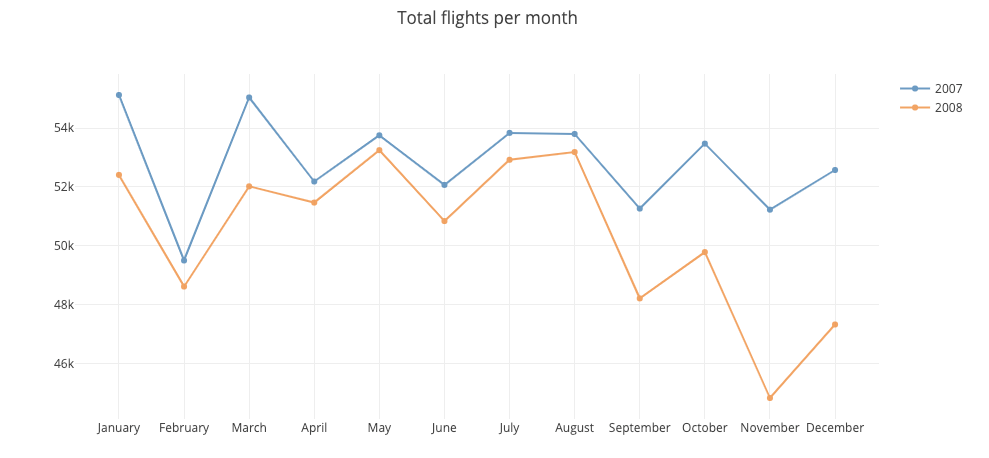

# Total flights per day of the month

In [8]:
l = pd.DataFrame({'flights_per_day' : flights.groupby(['Year','DayofMonth']).size()}).reset_index()

In [ ]:
trace0 = go.Bar(
    x=l.loc[l['Year'] == 2007]['DayofMonth'], name='2007',
    y=l.loc[l['Year'] == 2007]['flights_per_day'],
    opacity=0.75
)
trace1 = go.Bar(
    x=l.loc[l['Year'] == 2008]['DayofMonth'], name='2008',
    y=l.loc[l['Year'] == 2008]['flights_per_day'],
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(title='Total flights per day of the month')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

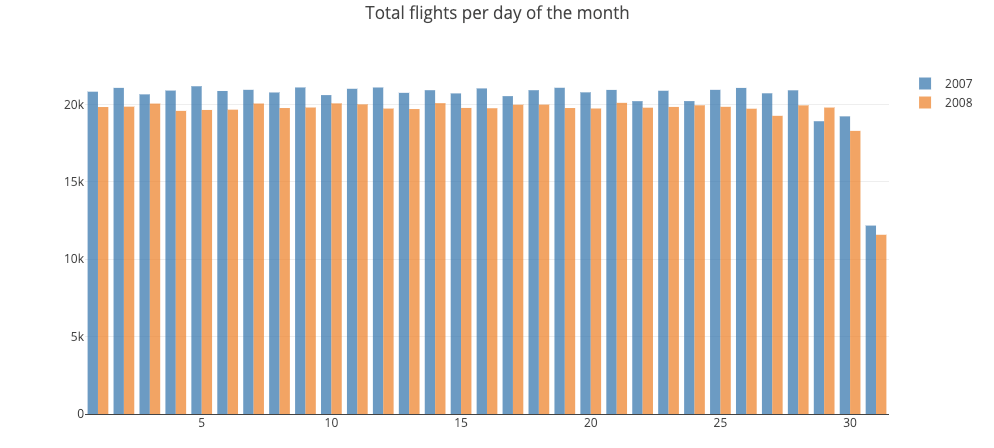

# Total flights per day of the week

In [9]:
l = pd.DataFrame({'flights_per_week_day' : flights.groupby(['Year','DayOfWeek']).size()}).reset_index()

In [10]:
l.head()

,Year,DayOfWeek,flights_per_week_day
0,2007,1,93391
1,2007,2,91964
2,2007,3,91871
3,2007,4,91674
4,2007,5,92088


In [ ]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tickvals = [1,2,3,4,5,6,7]

trace0 = go.Scatter(
    x=l.loc[l['Year'] == 2007]['DayOfWeek'], name='2007',
    y=l.loc[l['Year'] == 2007]['flights_per_week_day'],
    opacity=0.75
)
trace1 = go.Scatter(
    x=l.loc[l['Year'] == 2008]['DayOfWeek'], name='2008',
    y=l.loc[l['Year'] == 2008]['flights_per_week_day'],
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(title='Total flights per day of the week',
                   xaxis=go.layout.XAxis(
                        ticktext=days,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

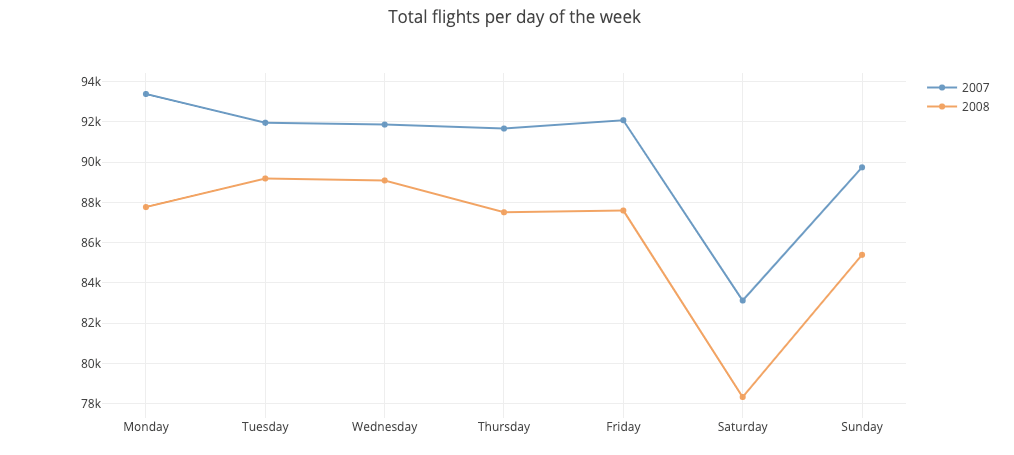

# Total flights per hour

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2007]['DepTime'], name='2007',
    opacity=0.75,
    #nbinsx = 24
)
trace1 = go.Histogram(
    x=flights.loc[flights['Year'] == 2008]['DepTime'], name='2008',
    opacity=0.75,
    #nbinsx = 24
)


data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Total flights per hour')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

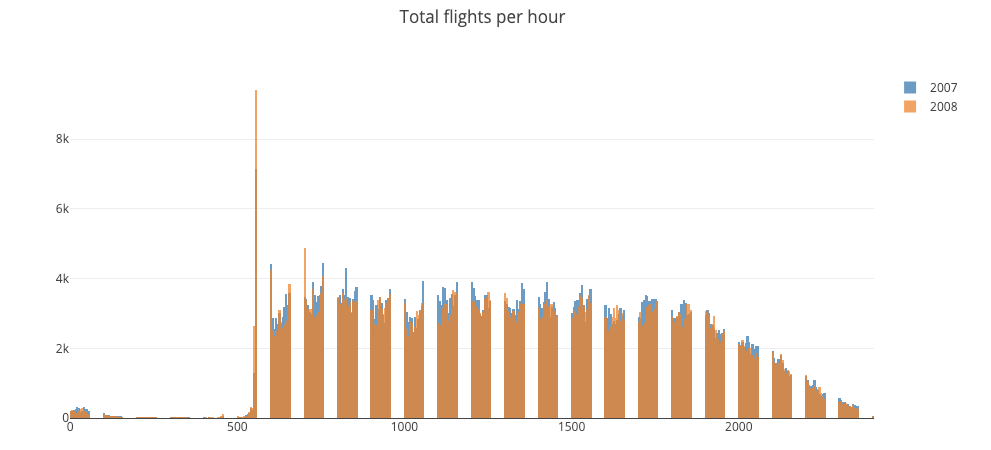

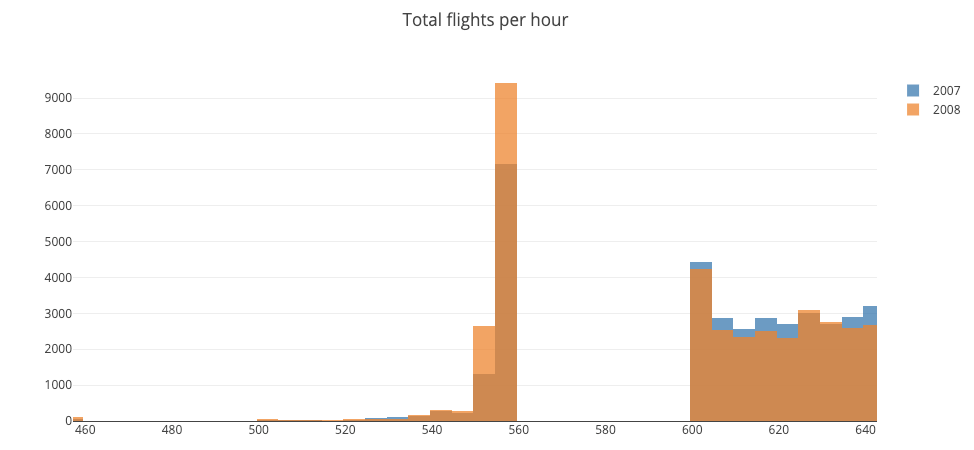

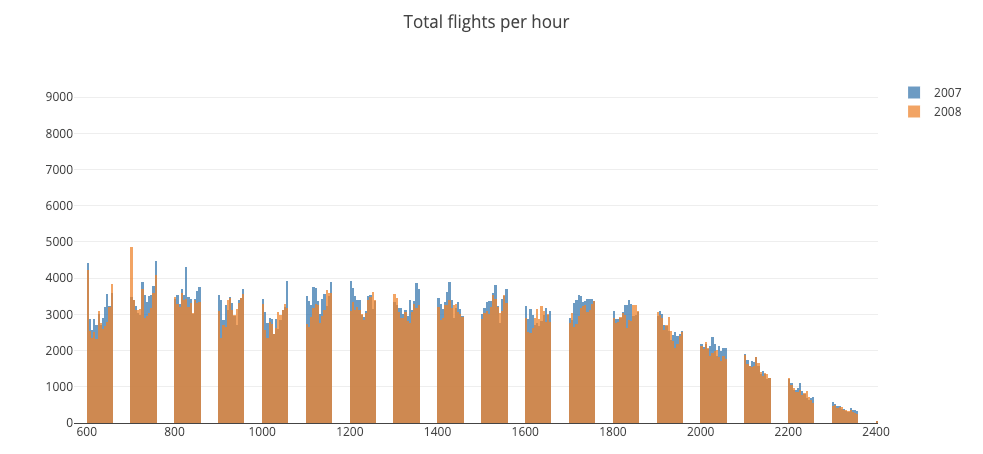

# Histogram of Air Time

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2007]['AirTime']/60, name='2007',
    opacity=0.75,
    #nbinsx = 24
)
trace1 = go.Histogram(
    x=flights.loc[flights['Year'] == 2008]['AirTime']/60, name='2008',
    opacity=0.75,
    #nbinsx = 24
)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Histogram of Air Time')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

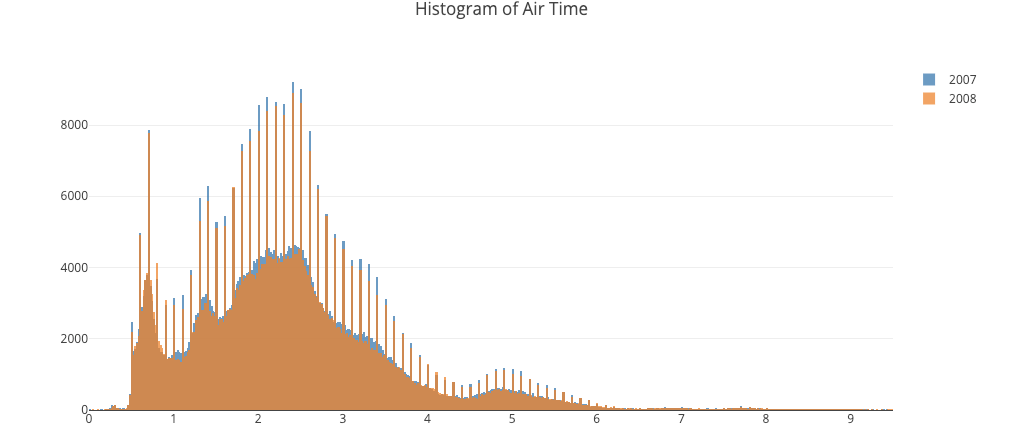

# Histogram of Arrival Delay

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2007]['ArrDelay'], name='2007',
    opacity=0.75,
    #nbinsx = 24
)
trace1 = go.Histogram(
    x=flights.loc[flights['Year'] == 2008]['ArrDelay'], name='2008',
    opacity=0.75,
    #nbinsx = 24
)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Histogram of Arrival Delay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

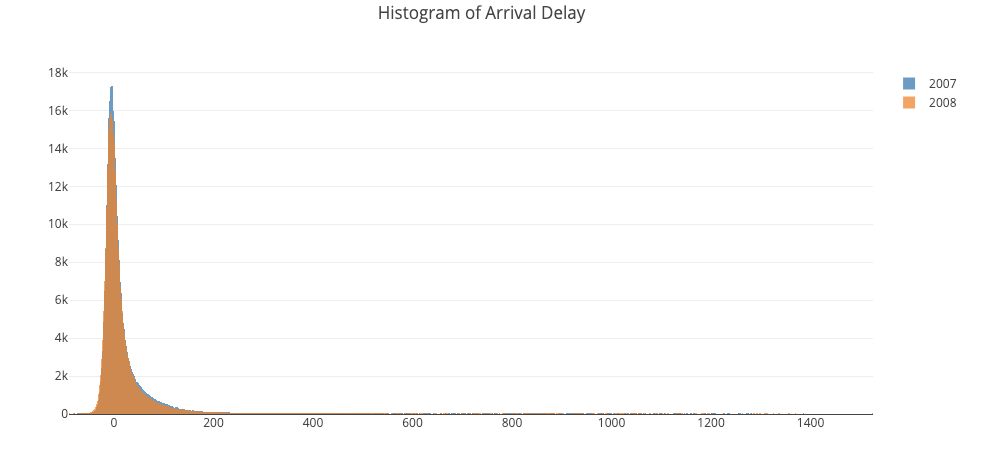

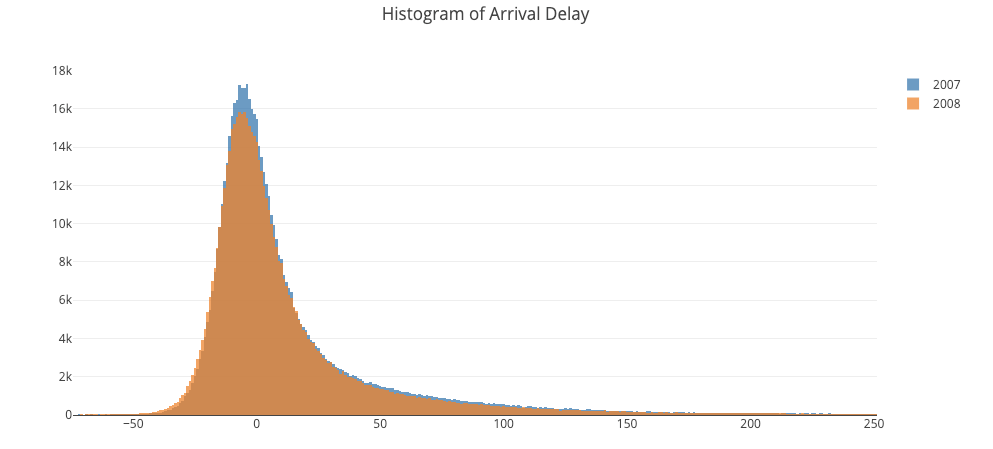

# Histogram of Departure Delay

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2007]['DepDelay'], name= '2007',
    opacity=0.75,
    #nbinsx = 24
)
trace1 = go.Histogram(
    x=flights.loc[flights['Year'] == 2008]['DepDelay'], name= '2008',
    opacity=0.75,
    #nbinsx = 24
)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Histogram of Departure Delay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

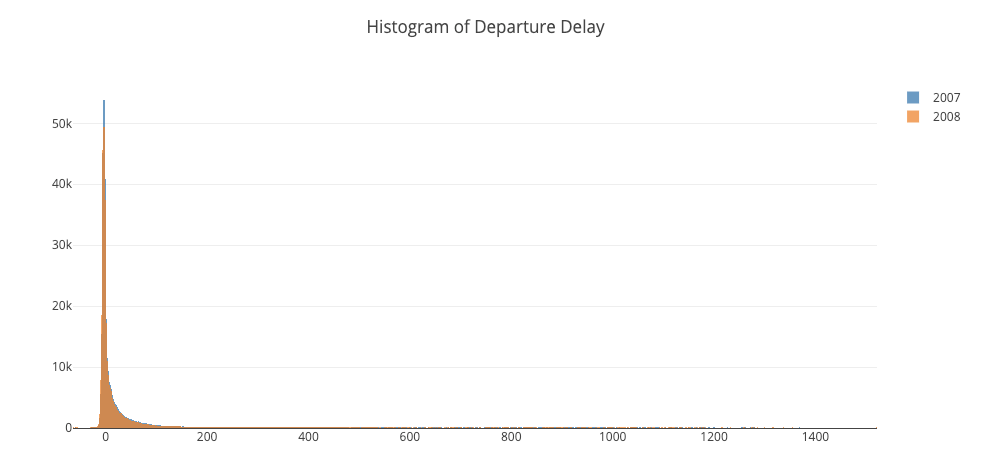

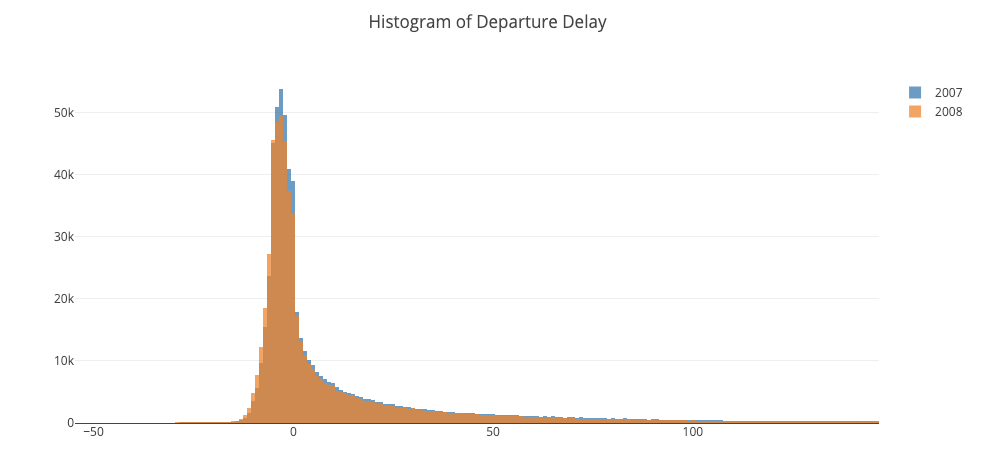

# Analysis of Origins and Destinations

In [12]:
Origins = pd.DataFrame({'flights' : flights.groupby(['Year','Origin']).size()}).reset_index()

In [ ]:
Origins7pop = Origins[Origins['Year'] == 2007].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).head(10)
Origins7unpop = Origins[Origins['Year'] == 2007].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).tail(10)
Origins8pop = Origins[Origins['Year'] == 2008].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).head(10)
Origins8unpop = Origins[Origins['Year'] == 2008].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).tail(10)

trace0 = go.Bar(
    x= Origins7pop['Origin'], name='2007',
    y= Origins7pop['flights'],
    opacity=0.75
)
trace1 = go.Bar(
    x= Origins7unpop['Origin'], name='2007',
    y= Origins7unpop['flights'],
    opacity=0.75
)
trace2 = go.Bar(
    x= Origins8pop['Origin'], name='2008',
    y= Origins8pop['flights'],
    opacity=0.75
)
trace3 = go.Bar(
    x= Origins8unpop['Origin'], name='2008',
    y= Origins8unpop['flights'],
    opacity=0.75
)

#data = [trace0]#, trace1]
#layout = go.Layout(title='Flights per month')

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Most popular origins in 2007', 
                                                          'Least popular origins in 2007',
                                                          'Most popular origins in 2008', 
                                                          'Least popular origins in 2008'))
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)


py.iplot(fig)

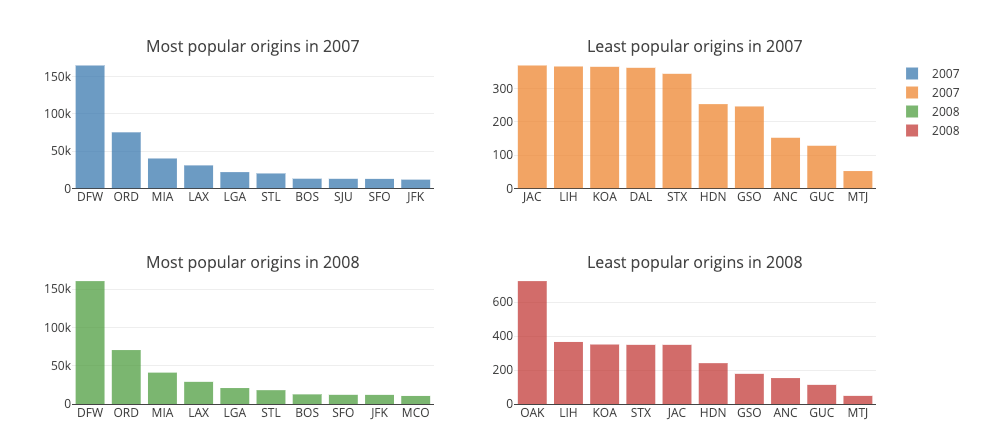

In [ ]:
Destinations = pd.DataFrame({'flights' : flights.groupby(['Year','Dest']).size()}).reset_index()

Dest7pop = Destinations[Destinations['Year'] == 2007].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).head(10)
Dest7unpop = Destinations[Destinations['Year'] == 2007].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).tail(10)
Destpop = Destinations[Destinations['Year'] == 2008].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).head(10)
Dest8unpop = Destinations[Destinations['Year'] == 2008].sort_values(
            by = 'flights', ascending = False).reset_index(drop = True).tail(10)


trace0 = go.Bar(
    x= Dest7pop['Dest'], name='2007',
    y= Dest7pop['flights'],
    opacity=0.75
)
trace1 = go.Bar(
    x= Dest7unpop['Dest'], name='2007',
    y= Dest7unpop['flights'],
    opacity=0.75
)
trace2 = go.Bar(
    x= Destpop['Dest'], name='2008',
    y= Destpop['flights'],
    opacity=0.75
)
trace3 = go.Bar(
    x= Dest8unpop['Dest'], name='2008',
    y= Dest8unpop['flights'],
    opacity=0.75
)


fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Most popular destinations in 2007', 
                                                          'Least popular destinations in 2007',
                                                          'Most popular destinations in 2008', 
                                                          'Least popular destinations in 2008'))
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)


py.iplot(fig)

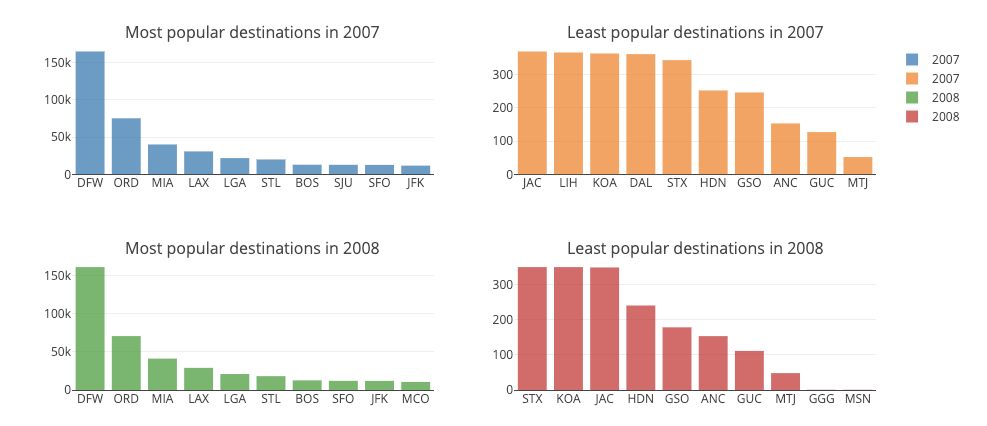

In [13]:
Origins[Origins['Origin'] == 'DAL'].reset_index()

,index,Year,Origin,flights
0,13,2007,DAL,362


# Histogram of distance

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2007]['Distance'], name='2007',
    opacity=0.75,
    nbinsx = 100
)
trace1 = go.Histogram(
    x=flights.loc[flights['Year'] == 2008]['Distance'], name='2008',
    opacity=0.75,
    nbinsx = 100
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Histogram of distance in 2007', 
                                                          'Histogram of distance in 2008'))
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)


py.iplot(fig)

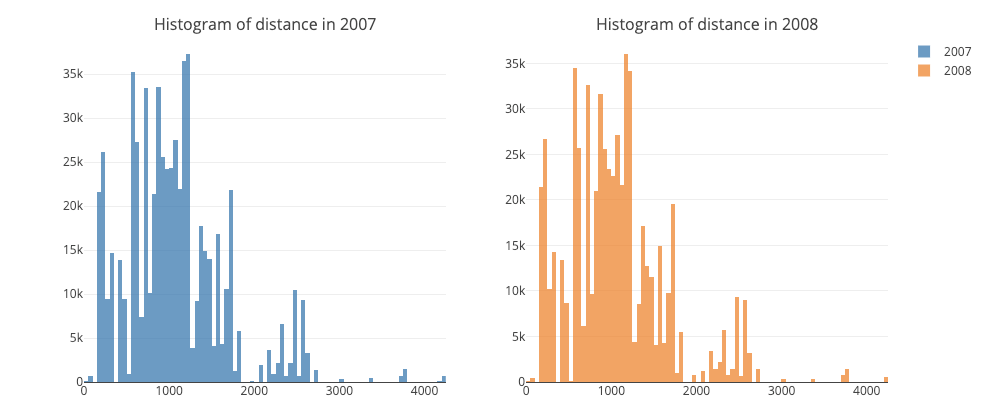

# Proportion of cancelled flights

In [14]:
Cancelled = pd.DataFrame({'cancelled' : flights.groupby(['Year','Cancelled']).size()}).reset_index()

In [15]:
Cancelled

,Year,Cancelled,cancelled
0,2007,0,615933
1,2007,1,17924
2,2008,0,587445
3,2008,1,17440


In [ ]:
not07 = Cancelled['cancelled'].loc[0] 
cancelled07 = Cancelled['cancelled'].loc[1]
not08 = Cancelled['cancelled'].loc[2] 
cancelled08 = Cancelled['cancelled'].loc[3]

fig = {
  "data": [
    {
      "values": [not07,cancelled07],
      "labels": [
        "Not cancelled",
        "Cancelled",
      ],
      "domain": {"column": 0},
      "name": "Flights in 2007",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [not08, cancelled08],
      "labels": [
        "Not cancelled",
        "Cancelled",
      ],
      "text":["2008"],
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "Flights in 2008",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Canceled proportion in 2007 and 2008",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2007",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2008",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

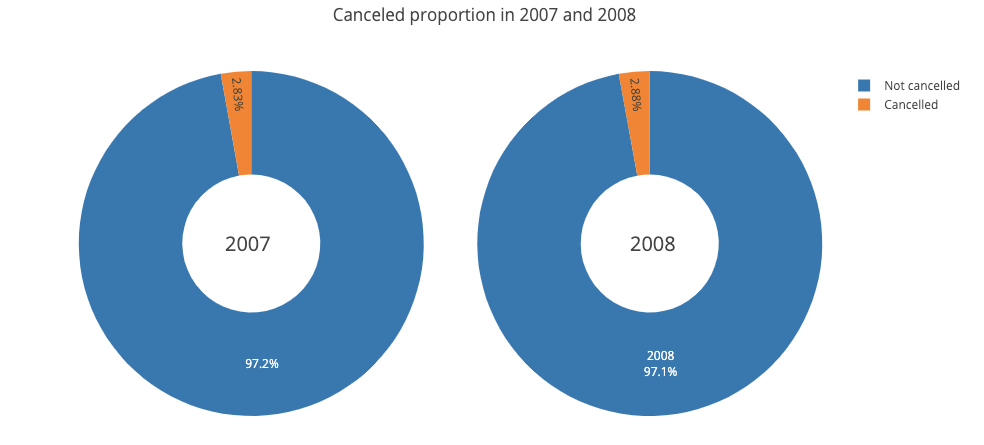

In [16]:
cancelled = flights[flights['Cancelled']==1]

In [17]:
cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
47,2007,1,17,3,NaN,930,NaN,1750,AA,2,0,NaN,320.0,NaN,NaN,NaN,LAX,JFK,2475,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
85,2007,1,24,3,NaN,1200,NaN,1505,AA,3,0,NaN,365.0,NaN,NaN,NaN,JFK,LAX,2475,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
310,2007,1,1,1,NaN,1115,NaN,1435,AA,15,0,NaN,380.0,NaN,NaN,NaN,JFK,SFO,2586,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
532,2007,1,18,4,NaN,800,NaN,1620,AA,24,0,NaN,320.0,NaN,NaN,NaN,SFO,JFK,2586,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
917,2007,1,4,4,NaN,1300,NaN,1520,AA,66,0,NaN,140.0,NaN,NaN,NaN,DFW,ORD,802,0.0,0.0,1,B,0,0.0,0.0,0.0,0.0,0.0


# Fraction of cancelled flights per day of the week

In [ ]:
days_cancelled07 = cancelled['Cancelled'].where(cancelled['Year'] == 2007).groupby(flights['DayOfWeek']).count()
days_total07 = flights['Cancelled'].where(flights['Year'] == 2007).groupby(flights['DayOfWeek']).count()
days_frac07 = np.divide(days_cancelled07, days_total07)
x07=days_frac07.index.values

days_cancelled08 = cancelled['Cancelled'].where(cancelled['Year'] == 2008).groupby(flights['DayOfWeek']).count()
days_total08 = flights['Cancelled'].where(flights['Year'] == 2008).groupby(flights['DayOfWeek']).count()
days_frac08 = np.divide(days_cancelled08, days_total08)
x08=days_frac08.index.values


days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tickvals = [1,2,3,4,5,6,7]

trace0 = go.Scatter(
    x=x07, name = '2007',
    y=days_frac07,
    opacity=0.75
)
trace1 = go.Scatter(
    x=x08, name = '2008',
    y=days_frac08,
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(title='Fraction of cancelled flights per day of the week',
                   xaxis=go.layout.XAxis(
                        ticktext=days,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



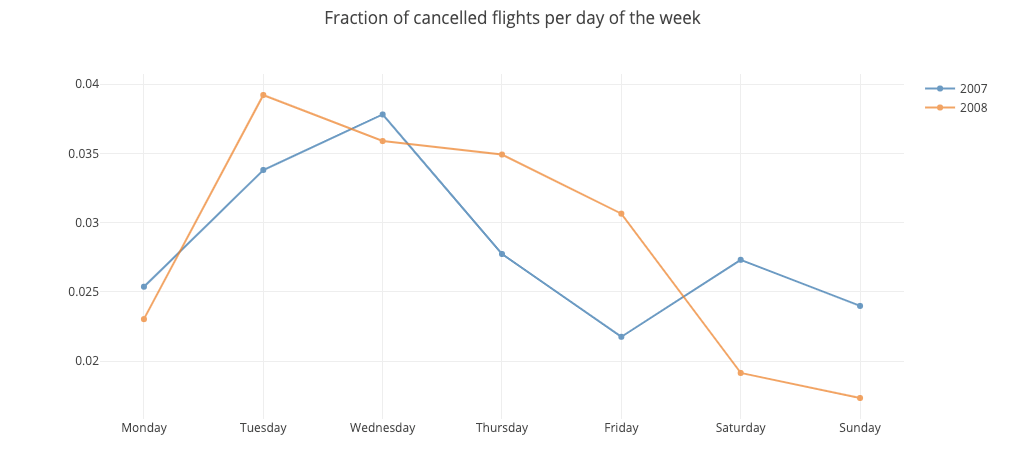

# Fraction of cancelled flights per month

In [ ]:
days_cancelled07 = cancelled['Cancelled'].where(cancelled['Year'] == 2007).groupby(flights['Month']).count()
days_total07 = flights['Cancelled'].where(flights['Year'] == 2007).groupby(flights['Month']).count()
days_frac07 = np.divide(days_cancelled07, days_total07)
x07=days_frac07.index.values

days_cancelled08 = cancelled['Cancelled'].where(cancelled['Year'] == 2008).groupby(flights['Month']).count()
days_total08 = flights['Cancelled'].where(flights['Year'] == 2008).groupby(flights['Month']).count()
days_frac08 = np.divide(days_cancelled08, days_total08)
x08=days_frac08.index.values


months = ['January','February','March','April','May','June','July','August',
          'September','October','November','December']
tickvals = [1,2,3,4,5,6,7,8,9,10,11,12]

trace0 = go.Scatter(
    x=x07, name = '2007',
    y=days_frac07,
    opacity=0.75
)
trace1 = go.Scatter(
    x=x08, name = '2008',
    y=days_frac08,
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(title='Fraction of cancelled flights per month',
                   xaxis=go.layout.XAxis(
                        ticktext=months,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



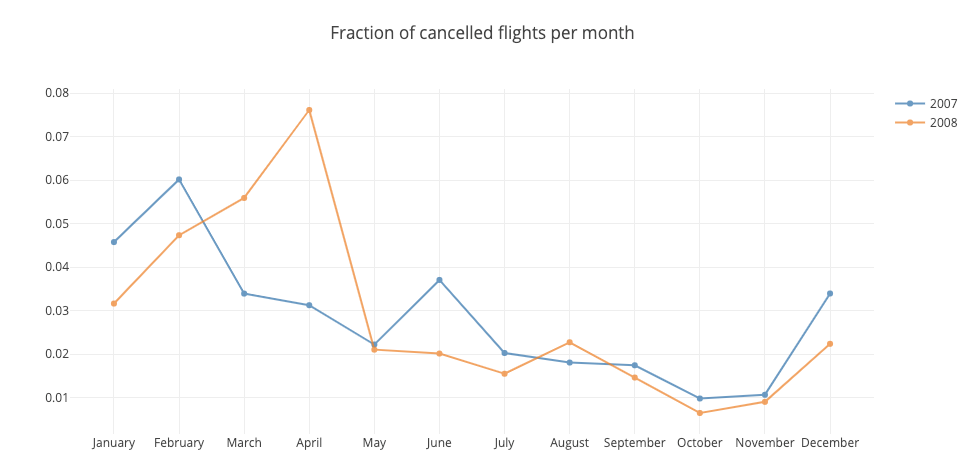

# Histogram of total and cancelled flights per month in 2007

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2007]['Month'], name=' Flights 2007',
    opacity=0.75,
    histnorm='probability'
    #nbinsx = 24
)
trace1 = go.Histogram(
    x=cancelled.loc[flights['Year'] == 2007]['Month'], name='Cancelled 2007',
    opacity=0.75,
    histnorm='probability'
    #nbinsx = 24
)

data = [trace0, trace1]

layout = go.Layout(title='Histogram of total and cancelled flights per month in 2007',
                   xaxis=go.layout.XAxis(
                        ticktext=months,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


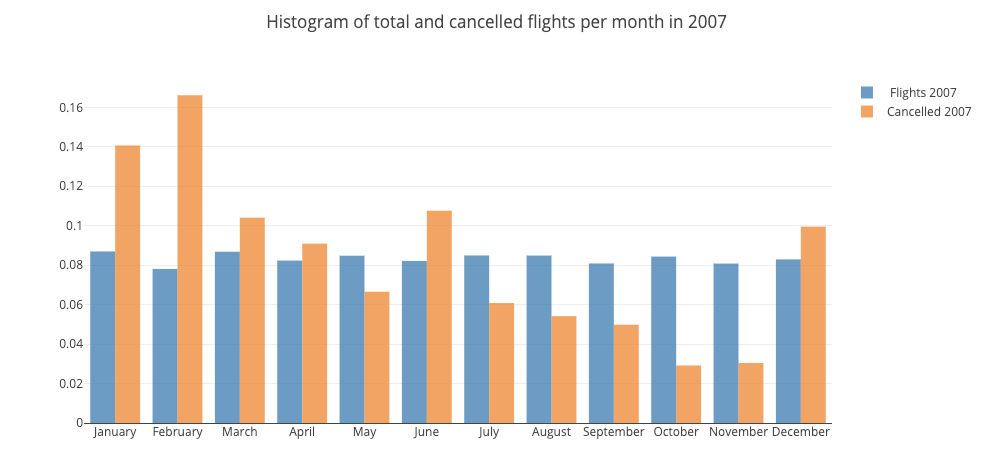

# Histogram of total and cancelled flights per month in 2008

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2008]['Month'], name=' Flights 2008',
    opacity=0.75,
    histnorm='probability'
    #nbinsx = 24
)
trace1 = go.Histogram(
    x=cancelled.loc[flights['Year'] == 2008]['Month'], name='Cancelled 2008',
    opacity=0.75,
    histnorm='probability'
    #nbinsx = 24
)

data = [trace0, trace1]

layout = go.Layout(title='Histogram of total and cancelled flights per month in 2008',
                   xaxis=go.layout.XAxis(
                        ticktext=months,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


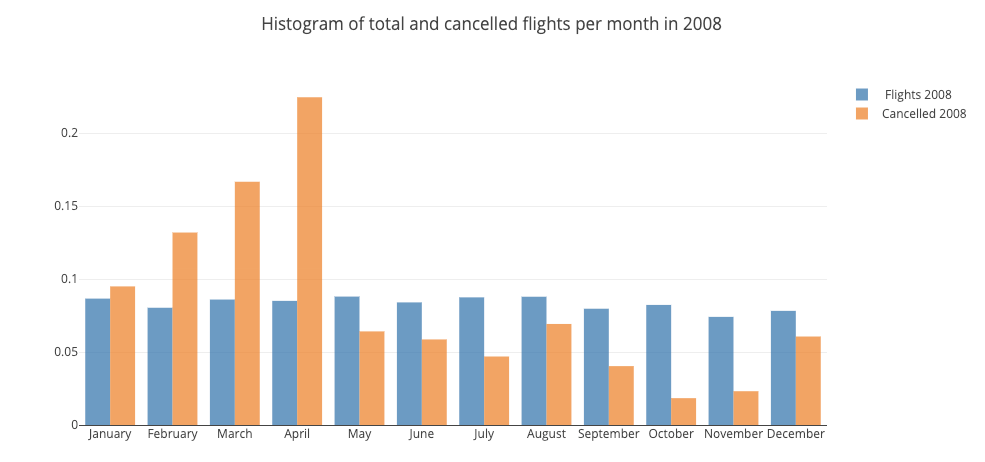

# Histogram of scheduled departure time of flights in 2007

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2007]['CRSDepTime'], name='Success',
    opacity=0.75,
    histnorm='probability',
    nbinsx = 24
)
trace1 = go.Histogram(
    x=cancelled.loc[flights['Year'] == 2007]['CRSDepTime'], name='Cancelled',
    opacity=0.75,
    histnorm='probability',
    nbinsx = 24
)

data = [trace0, trace1]

layout = go.Layout(title='Histogram of scheduled departurte time of flights in 2007')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


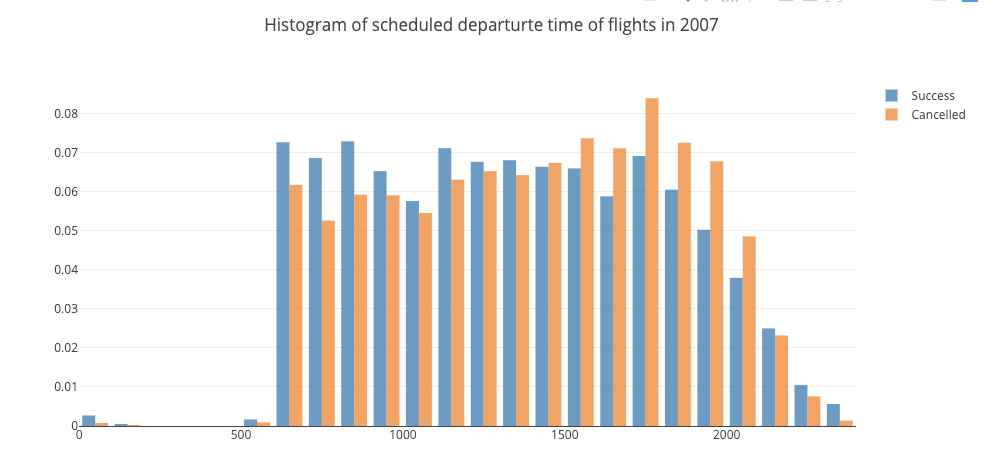

# Histogram of scheduled departure time of flights in 2008

In [ ]:
trace0 = go.Histogram(
    x=flights.loc[flights['Year'] == 2008]['CRSDepTime'], name='Success',
    opacity=0.75,
    histnorm='probability',
    nbinsx = 24
)
trace1 = go.Histogram(
    x=cancelled.loc[flights['Year'] == 2008]['CRSDepTime'], name='Cancelled',
    opacity=0.75,
    histnorm='probability',
    nbinsx = 24
)

data = [trace0, trace1]

layout = go.Layout(title='Histogram of scheduled departure time of flights 2008')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


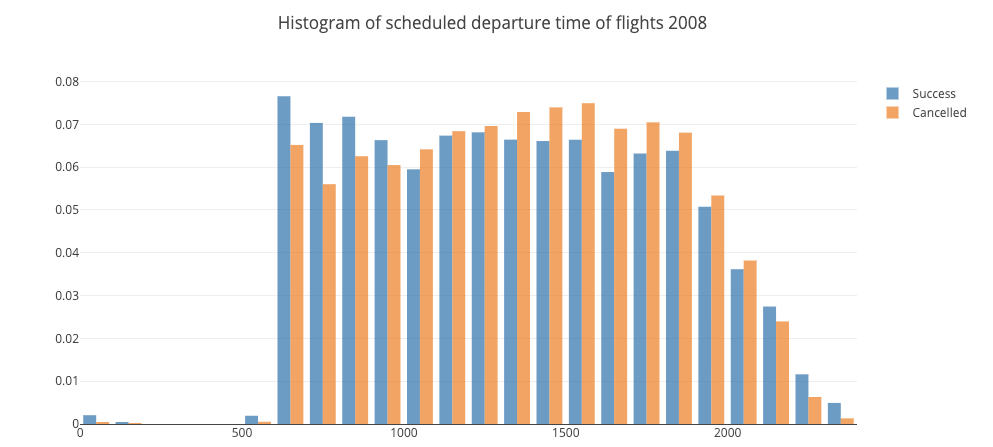

# Cancellation reasons in 2007 and 2008

In [ ]:
A7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'A') & (cancelled['Year'] == 2007)])
B7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'B') & (cancelled['Year'] == 2007)])
C7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'C') & (cancelled['Year'] == 2007)])
D7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'D') & (cancelled['Year'] == 2007)])

A8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'A') & (cancelled['Year'] == 2008)])
B8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'B') & (cancelled['Year'] == 2008)])
C8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'C') & (cancelled['Year'] == 2008)])
D8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'D') & (cancelled['Year'] == 2008)])

fig = {
  "data": [
    {
      "values": [A7,B7,C7,D7],
      "labels": [
        "Carrier",
        "Weather",
        "National Airports System",
        'Secourity'
      ],
      "domain": {"column": 0},
      "name": "Cancellation reasons in 2007",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [A8,B8,C8,D8],
      "labels": [
        "Carrier",
        "Weather",
        "National Airports System",
        'Secourity'
      ],
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "Cancellation reasons in 2008",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Cancellation reasons in 2007 and 2008",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2007",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2008",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

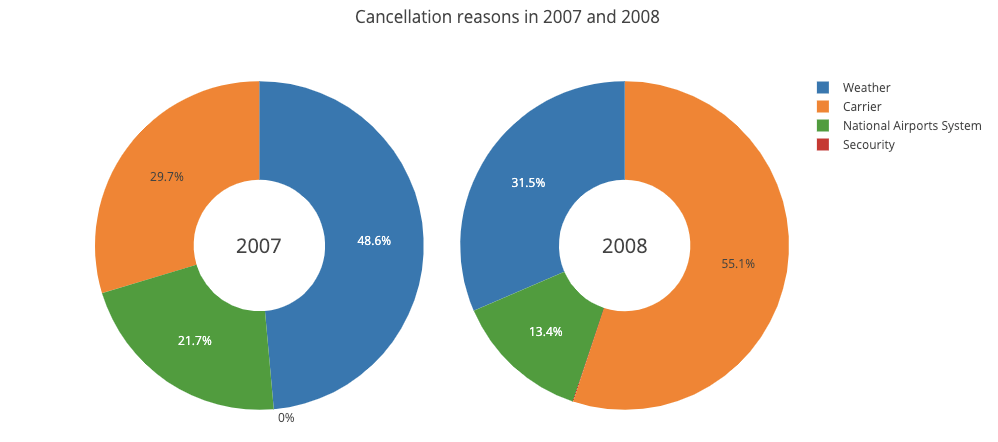

# Proportion of cancelled flights in 2007 and 2008

In [ ]:
success7 = len(flights.loc[(flights['Cancelled'] != 1) & (flights['Year'] == 2007)])
A7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'A') & (cancelled['Year'] == 2007)])
B7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'B') & (cancelled['Year'] == 2007)])
C7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'C') & (cancelled['Year'] == 2007)])
D7 = len(cancelled.loc[(cancelled['CancellationCode'] == 'D') & (cancelled['Year'] == 2007)])

success8 = len(flights.loc[(flights['Cancelled'] != 1) & (flights['Year'] == 2008)])
A8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'A') & (cancelled['Year'] == 2008)])
B8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'B') & (cancelled['Year'] == 2008)])
C8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'C') & (cancelled['Year'] == 2008)])
D8 = len(cancelled.loc[(cancelled['CancellationCode'] == 'D') & (cancelled['Year'] == 2008)])

fig = {
  "data": [
    {
      "values": [success7,A7,B7,C7,D7],
      "labels": [
        "Successful flights",
        "Carrier",
        "Weather",
        "National Airports System",
        'Secourity'
      ],
      "domain": {"column": 0},
      "name": "Cancellation reasons in 2007",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [success8,A8,B8,C8,D8],
      "labels": [
        "Successful flights",
        "Carrier",
        "Weather",
        "National Airports System",
        'Secourity'
      ],
      "domain": {"column": 1},
      "name": "Cancellation reasons in 2008",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Proportion of cancelled flights in 2007 and 2008",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2007",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2008",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

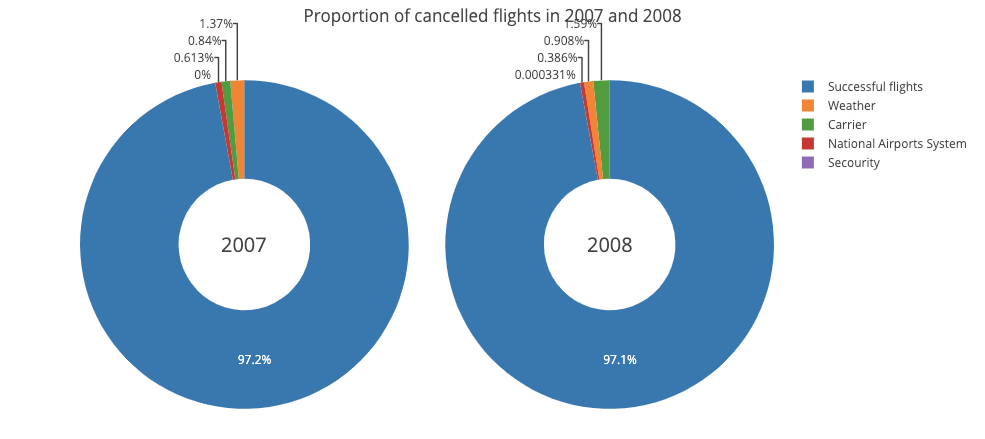

In 2007 the main reason for flight cancellation was weather, however in 2008 the main reason was carrier. Let's take a closer look at those over the months and see wether we may find something interesting there. 

# Fraction of cancelled flights per month due to weather in 2007

In [ ]:
days_cancelled07 = cancelled['Cancelled'].where(
    (cancelled['Year'] == 2007) & (cancelled['CancellationCode'] == 'B')).groupby(flights['Month']).count()
days_total07 = flights['Cancelled'].where(flights['Year'] == 2007).groupby(flights['Month']).count()
days_frac07 = np.divide(days_cancelled07, days_total07)
x07=days_frac07.index.values

months = ['January','February','March','April','May','June','July','August',
          'September','October','November','December']
tickvals = [1,2,3,4,5,6,7,8,9,10,11,12]

trace0 = go.Scatter(
    x=x07, name = '2007',
    y=days_frac07,
    opacity=0.75
)


data = [trace0]
layout = go.Layout(title='Fraction of cancelled flights per month due to weather in 2007',
                   xaxis=go.layout.XAxis(
                        ticktext=months,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



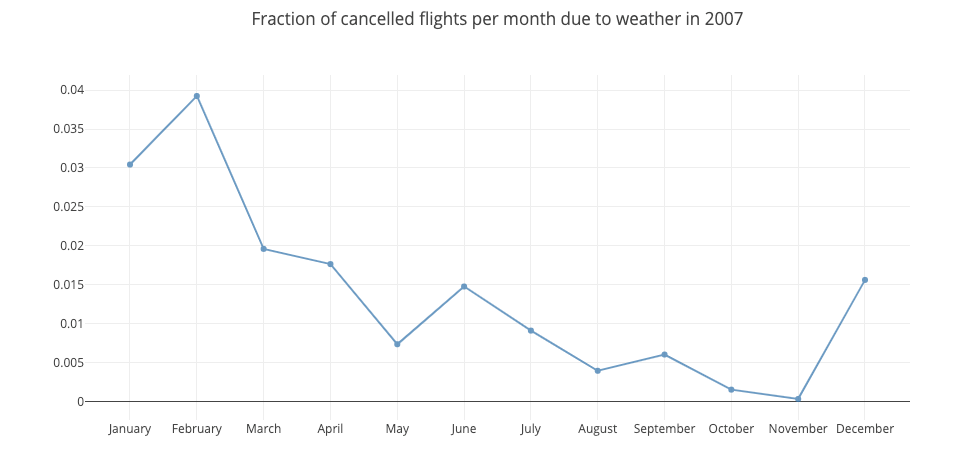

# Fraction of cancelled flights due to weather in February 2007

In [ ]:
days_cancelled07 = cancelled['Cancelled'].where(
    (cancelled['Year'] == 2007) & (cancelled['CancellationCode'] == 'B') &(cancelled['Month'] == 2)
                                                ).groupby(flights['DayofMonth']).count()
days_total07 = flights.iloc[:,0].where(
    (flights['Year'] == 2007) & (flights['Month'] == 2)).groupby(flights['DayofMonth']).count()
days_frac07 = np.divide(days_cancelled07, days_total07)
x07=days_frac07.index.values

trace0 = go.Scatter(
    x=x07, name = '2007',
    y=days_frac07,
    opacity=0.75
)


data = [trace0]
layout = go.Layout(title='Fraction of cancelled flights due to weather in February 2007')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



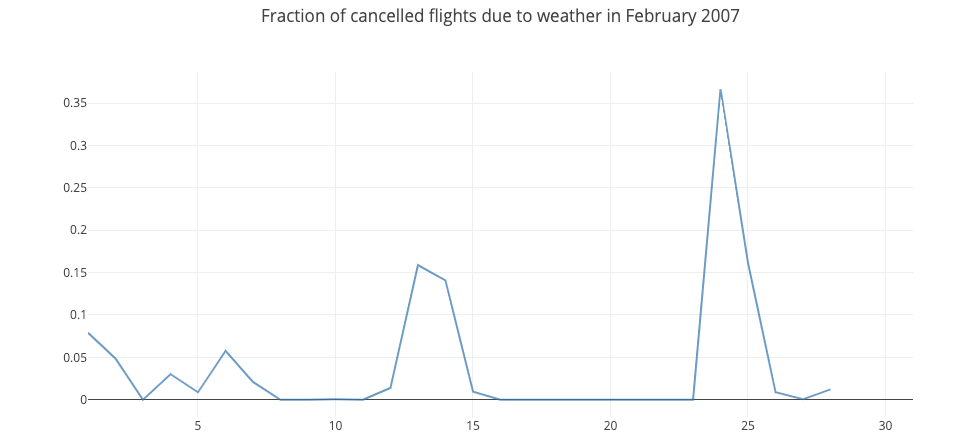

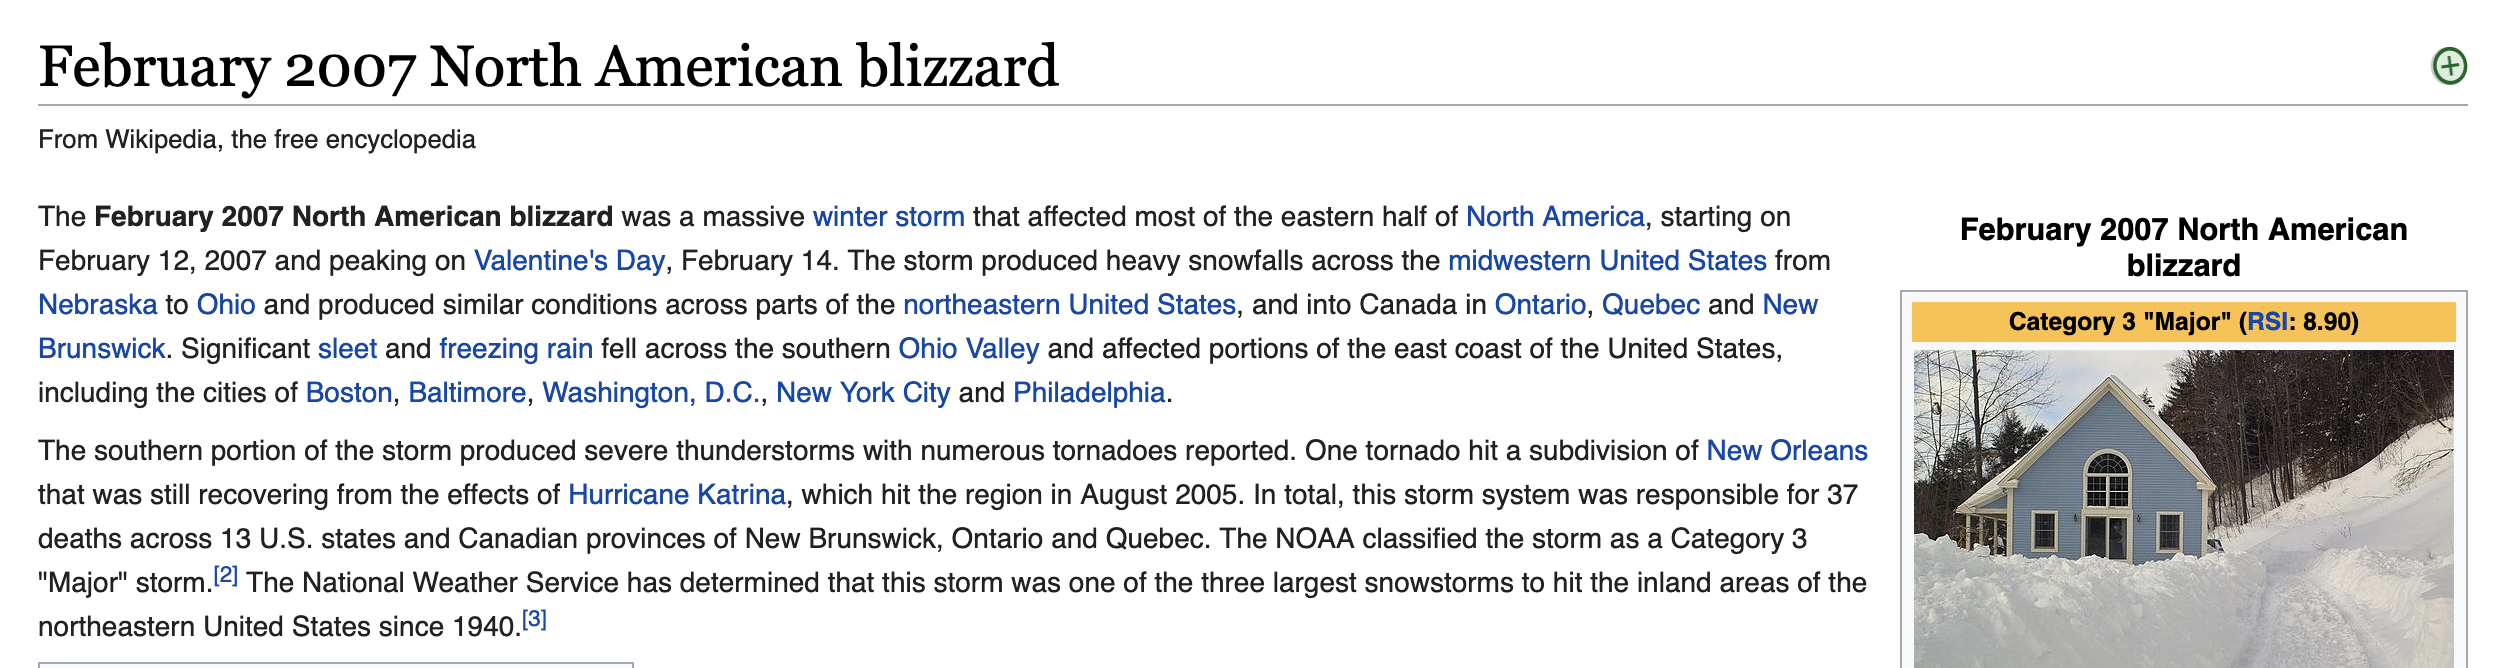
source: https://en.wikipedia.org/wiki/February_2007_North_American_blizzard

# Fraction of cancelled flights per month due to carrier in 2008

In [ ]:
days_cancelled08 = cancelled['Cancelled'].where(
    (cancelled['Year'] == 2008) & (cancelled['CancellationCode'] == 'A')).groupby(flights['Month']).count()
days_total08 = flights['Cancelled'].where(flights['Year'] == 2008).groupby(flights['Month']).count()
days_frac08 = np.divide(days_cancelled08, days_total08)
x08=days_frac08.index.values

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
tickvals = [1,2,3,4,5,6,7,8,9,10,11,12]

trace0 = go.Scatter(
    x=x08, name = '2008',
    y=days_frac08,
    opacity=0.75
)


data = [trace0]
layout = go.Layout(title='Fraction of cancelled flights per month due to carrier in 2008',
                   xaxis=go.layout.XAxis(
                        ticktext=months,
                        tickvals=tickvals)
                  )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



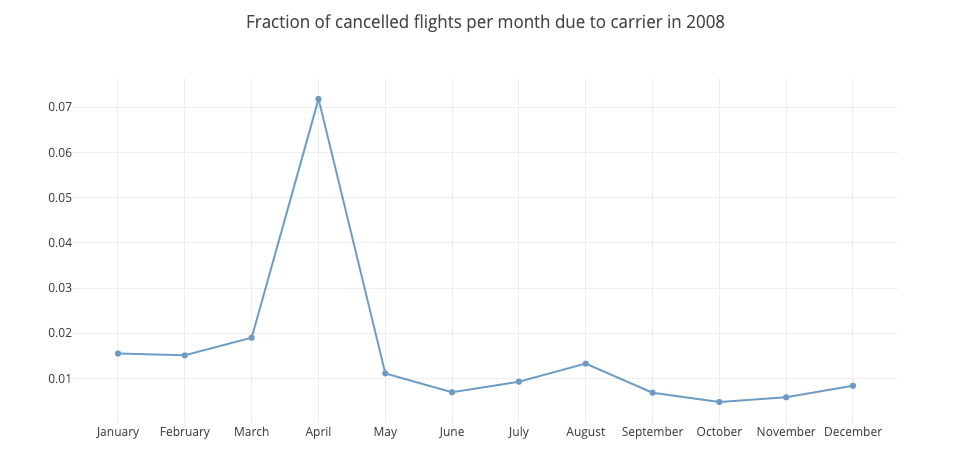

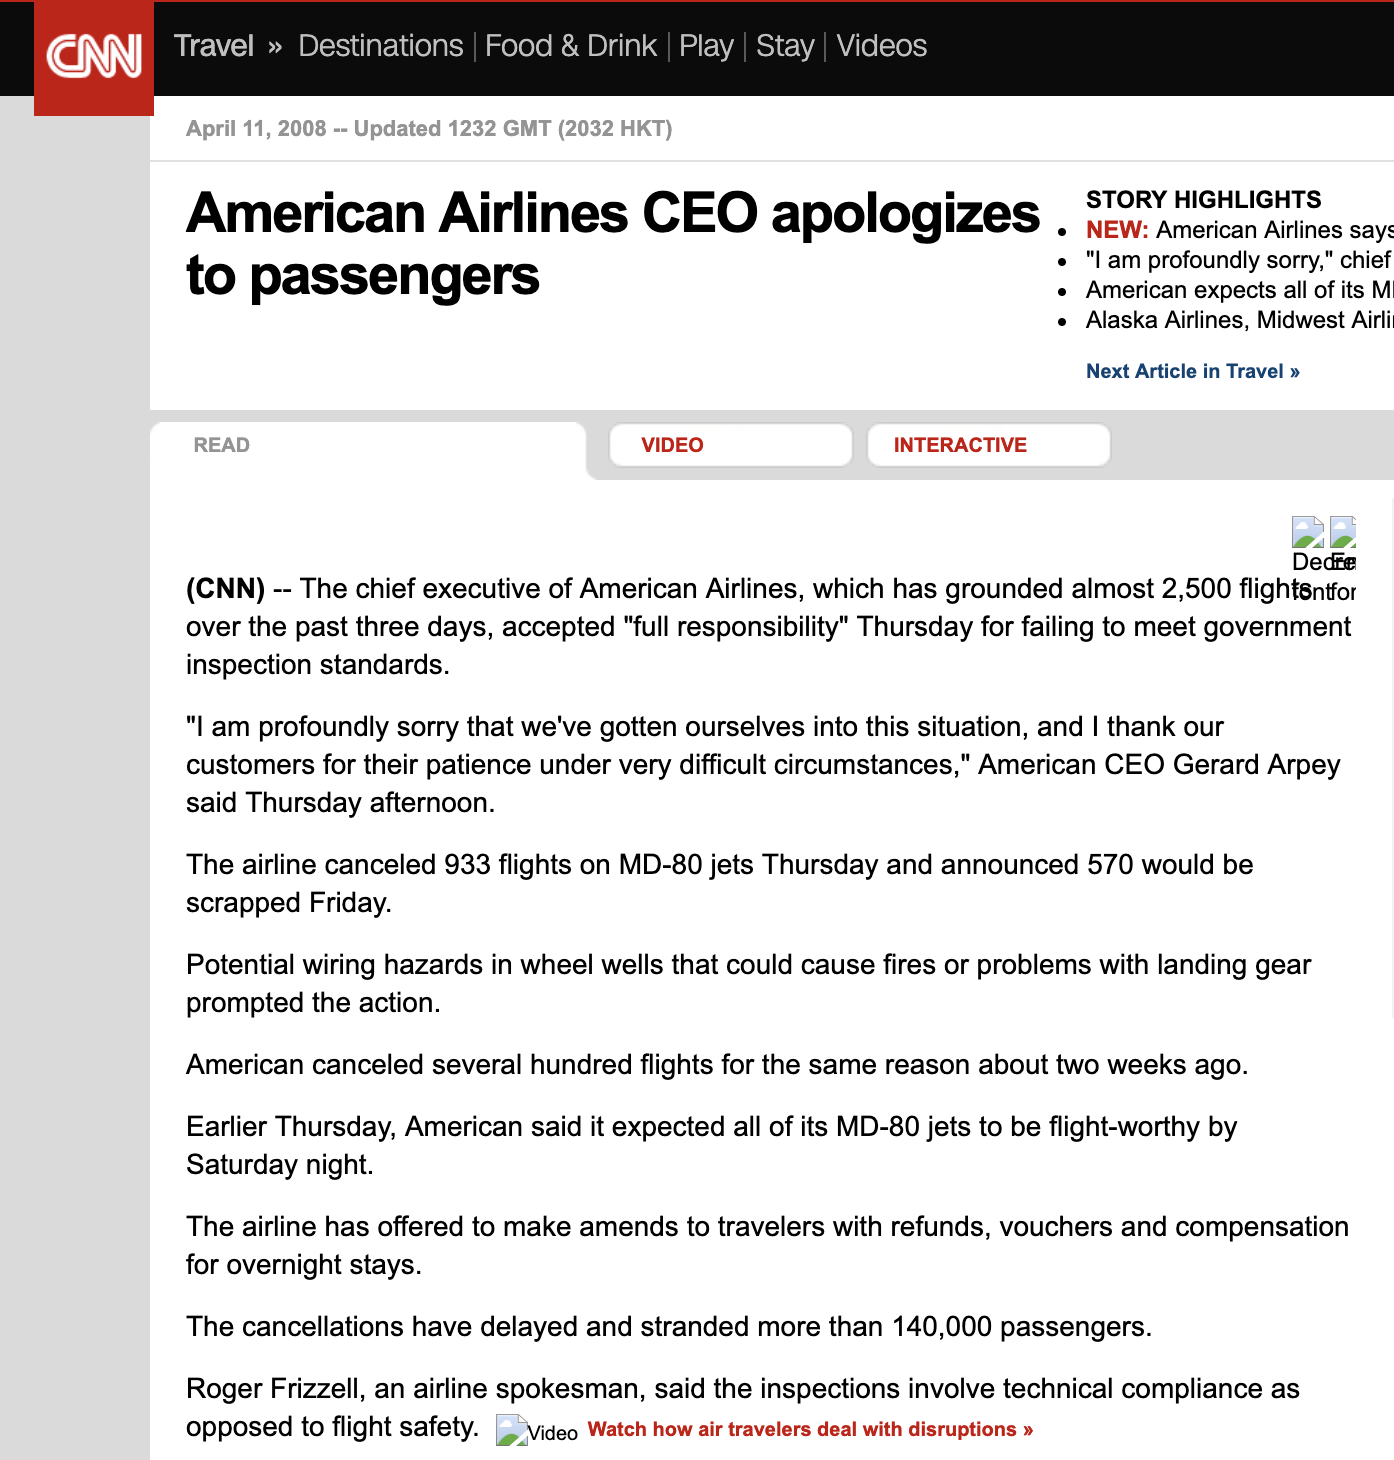
source : http://edition.cnn.com/2008/TRAVEL/04/10/american.cancellations/#cnnSTCText

Article from CNN shows that in April 2008 due to ailing to meet government inspection standards 2500 American Airlines airplanes were grounded. 

# Fraction of cancelled flights per day due to carrier in April 2008

In [ ]:
days_cancelled08 = cancelled['Cancelled'].where(
    (cancelled['Year'] == 2008) & (cancelled['CancellationCode'] == 'A') &(cancelled['Month'] == 4)
                                                ).groupby(flights['DayofMonth']).count()
days_total08 = flights.iloc[:,0].where(
    (flights['Year'] == 2008) & (flights['Month'] == 4)).groupby(flights['DayofMonth']).count()
days_frac08 = np.divide(days_cancelled08, days_total08)
x08=days_frac08.index.values

trace0 = go.Scatter(
    x=x08, name = '2008',
    y=days_frac08,
    opacity=0.75
)


data = [trace0]
layout = go.Layout(title='Fraction of cancelled flights per day due to carrier in April 2008')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



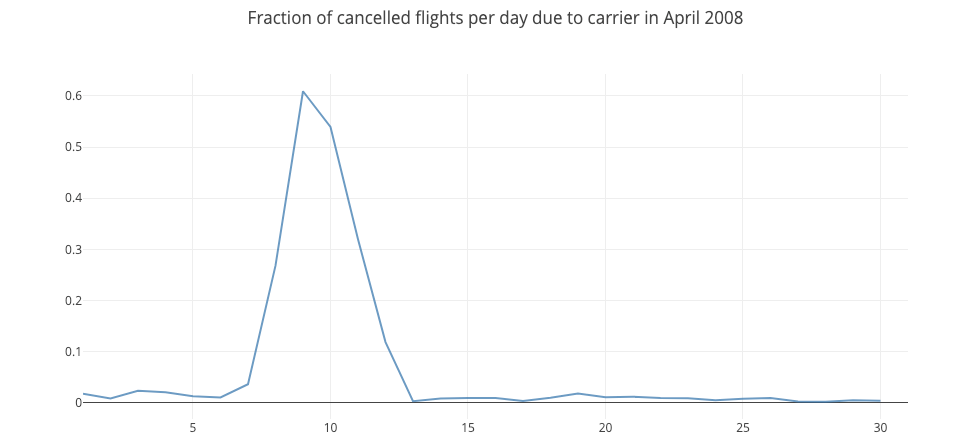